In [20]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Load the data, throw out the 1st column.

In [2]:
df = pd.read_csv('wine.data', names = ['Class','Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 
                                       'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins',
                                       'ColorIntensity', 'Hue', 'OD', 'Proline'], header = None)
df.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
classes = df.pop('Class')
df.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Scale the data (clustering is sensitive to scale)

In [4]:
scalar = StandardScaler().fit(df)
df = scalar.transform(df)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## Find the distance between pairs of all 13-dimensional vectors
- Use pdist
- This results in a single large vector
- Convert this to a squre matrix using squareform

In [5]:
distances = pdist(df)

In [6]:
d = squareform(distances)

## After you have all the distances from all points to all points, then use linkage to create the clusters

### Single Method

In [7]:
single_clusters = linkage(d, method = 'single')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


To visualize your clusters use dendrogram

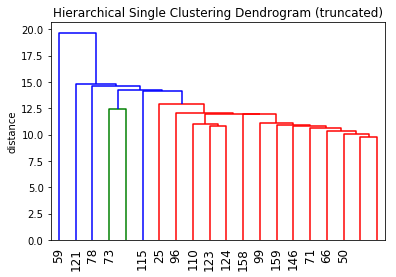

In [8]:
plt.title('Hierarchical Single Clustering Dendrogram (truncated)')
plt.ylabel('distance')
dendrogram(
    single_clusters,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    #show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### Complete

In [9]:
complete_clusters = linkage(d, method = 'complete')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


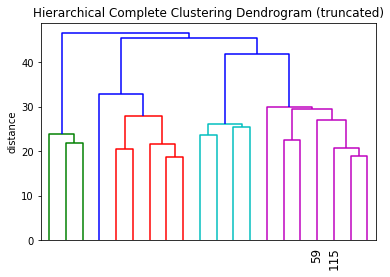

In [10]:
plt.title('Hierarchical Complete Clustering Dendrogram (truncated)')
plt.ylabel('distance')
dendrogram(
    complete_clusters,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.
    #show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### Average Method

In [11]:
average_clusters = linkage(d, method = 'average')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


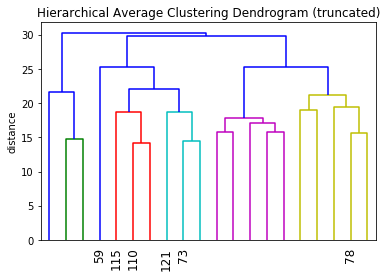

In [12]:
plt.title('Hierarchical Average Clustering Dendrogram (truncated)')
plt.ylabel('distance')
dendrogram(
    average_clusters,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.
    #show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### To get the top 3 clusters, use fcluster

In [13]:
avg_labels = fcluster(average_clusters, 3, criterion = 'maxclust')

In [14]:
complete_labels = fcluster(complete_clusters, 3, criterion = 'maxclust')

In [15]:
single_labels = fcluster(single_clusters, 3, criterion = 'maxclust')

### Compare your top 3 clusters to the actual data (col 1) and see how close it is

In [21]:
unique, counts = np.unique(avg_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  1  47]
 [  2   9]
 [  3 122]]


In [23]:
unique, counts = np.unique(complete_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 1 49]
 [ 2 82]
 [ 3 47]]


In [24]:
unique, counts = np.unique(single_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  1 176]
 [  2   1]
 [  3   1]]


In [25]:
unique, counts = np.unique(classes, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 1 59]
 [ 2 71]
 [ 3 48]]
